In [48]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('USA_Housing.csv')
df = df.drop(['Address'], axis=1)
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
X = df[:,0:6]
y = df[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
model = MLPRegressor(hidden_layer_sizes=[100,100] ,max_iter=1000000, activation='tanh', alpha=0.00001)
model.fit(x_train,y_train)
y_p = model.predict(x_test)
y_a = model.predict(x_train)
print('--------- coeficiente de determinación -------------')
print('El valor de r^2 en la prueba es {:.4f}'.format(r2_score(y_test, y_p)))
print('El valor de r^2 en el entrenamiento es {:.4f}'.format(r2_score(y_train, y_a)))

--------- coeficiente de determinación -------------
El valor de r^2 en la prueba es 0.9990
El valor de r^2 en el entrenamiento es 0.9991


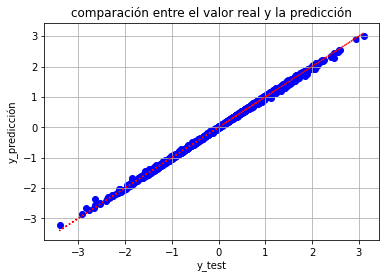

In [92]:
plt.figure()
plt.plot(y_test, y_test, color='r', linestyle='dotted')
plt.scatter(y_test, y_p, marker='o', color='b')
plt.xlabel('y_test')
plt.ylabel('y_predicción')
plt.title('comparación entre el valor real y la predicción')
plt.grid()